# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.18.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\data\dataset\train_data",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2054 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'foriegners': 0, 'indians': 1}

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\data\dataset\train_data",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2054 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

# 1st dense layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# 2nd dense layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 50)

C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.5765 - loss: 0.6873

C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5764 - loss: 0.6873 - val_accuracy: 0.5789 - val_loss: 0.6842
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 679ms/step - accuracy: 0.5905 - loss: 0.6833 - val_accuracy: 0.5789 - val_loss: 0.6778
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 685ms/step - accuracy: 0.5738 - loss: 0.6769 - val_accuracy: 0.5789 - val_loss: 0.6800
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 677ms/step - accuracy: 0.5871 - loss: 0.6757 - val_accuracy: 0.5789 - val_loss: 0.6922
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 45s 703ms/step - accuracy: 0.5750 - loss: 0.6799 - val_accuracy: 0.5794 - val_loss: 0.6590
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 45s 702ms/step - accuracy: 0.5764 - loss: 0.6627 - val_accuracy: 0.5789 - val_loss: 0.6615
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 682ms/step - accuracy: 0.5767 - loss: 0.6652 - val_accuracy: 0.6329 - val_loss: 0.6495
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 43s 667ms/step - accuracy: 0.6010 - loss: 0.6489 - val_accuracy: 0.6412 -

# saving the model

In [22]:
cnn.save(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\data\cnn.dense4_conv4.keras")
print("Saved model to disk")

Saved model to disk


# loading the model

In [24]:
from numpy import loadtxt
from tensorflow.keras.models import load_model


# load model
cnn = load_model(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\data\cnn.dense4_conv4.keras")
# summarize model.
cnn.summary()

# split into input and output variables

# evaluate the model


C:\Users\user\Desktop\all folders\MachineLearning\sample_project_1\env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,092 (1.41 MB)

 Trainable params: 184,545 (720.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184,547 (720.89 KB)

In [26]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\data\dataset\test_data",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 908 images belonging to 2 classes.


In [29]:
import numpy as np

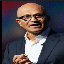

In [39]:
test_image = tf.keras.utils.load_img(r"C:\Users\user\Desktop\Edgematrix\DeepLearning\data\dataset\img2.png", target_size = (64, 64))
test_image

In [40]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] <= 0.5:
  prediction = 'Foreigner'
else:
  prediction = 'Indian'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [41]:
print(prediction)

Indian


In [42]:
result[0][0]

0.9338649